# Importing libraries

In [308]:
# Importing our main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense

In [309]:
# we try to read the main csv file that contain all the data, we need to specify the type of seperator which is ';'
dataset = pd.read_csv('bank-additional-full.csv',sep=';')
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [310]:
# Now, we want to check the category of our variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Displaying the list of our categorical variables

In [311]:
# The List of categorical variables
cat = (dataset.dtypes == 'object')
object_cols = list(cat[cat].index)

print("The list of Categorical variables:\n")
print(object_cols)


The list of Categorical variables:

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


##  Checking missing values 

In [312]:
# shows the number of missings per each column
dataset.isna().sum()    

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Duplicated values

In [313]:
# Removing duplicate rows if there is any
print('Shape before deleting duplicate values:', dataset.shape)
SalaryData=dataset.drop_duplicates()
print('Shape After deleting duplicate values:', dataset.shape)
# The data doesnt contain any duplicate values or missing ones

Shape before deleting duplicate values: (41188, 21)
Shape After deleting duplicate values: (41188, 21)


# Basic data exploration

In [314]:
dataset.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [315]:
# Visual exploratory data analysis: we try to do plot each categorical variables

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])
    

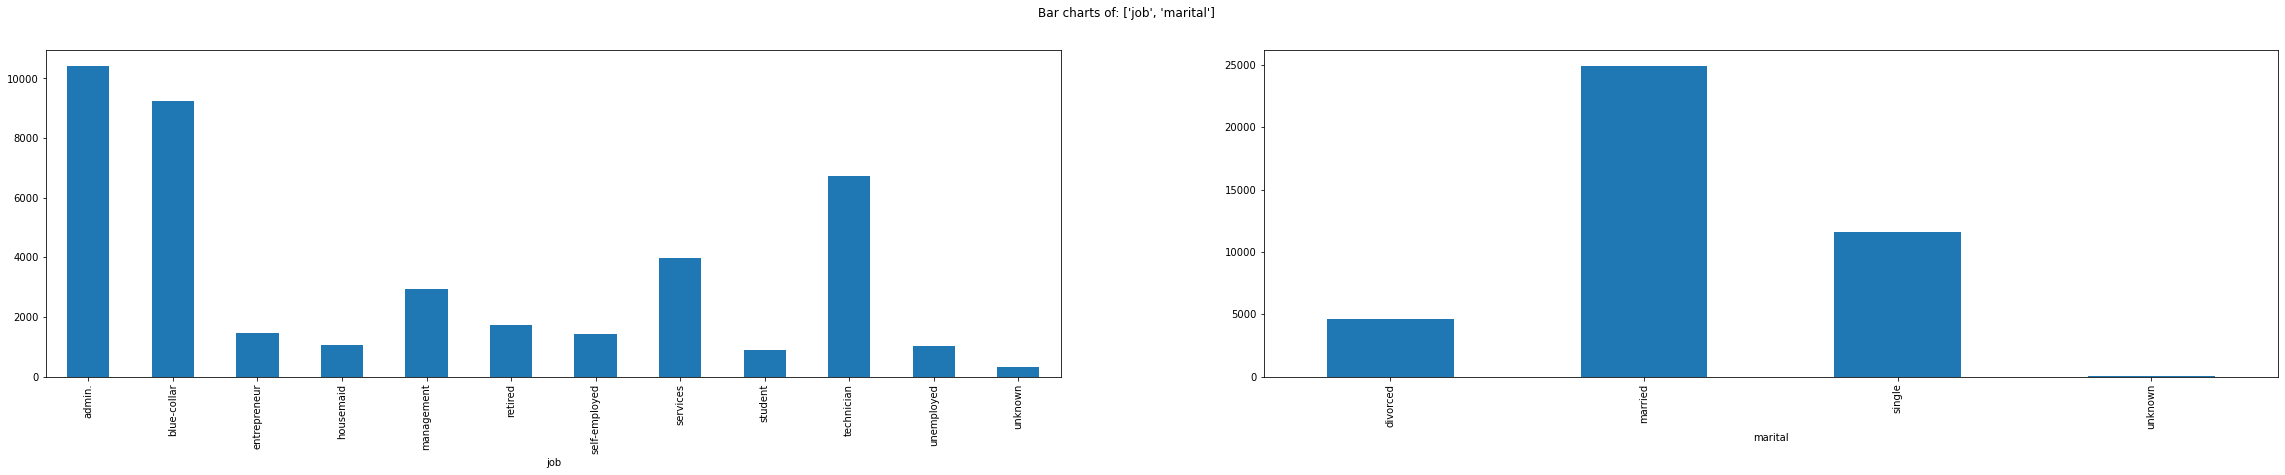

In [316]:
PlotBarCharts(inpData=dataset, colsToPlot=['job', 'marital']);


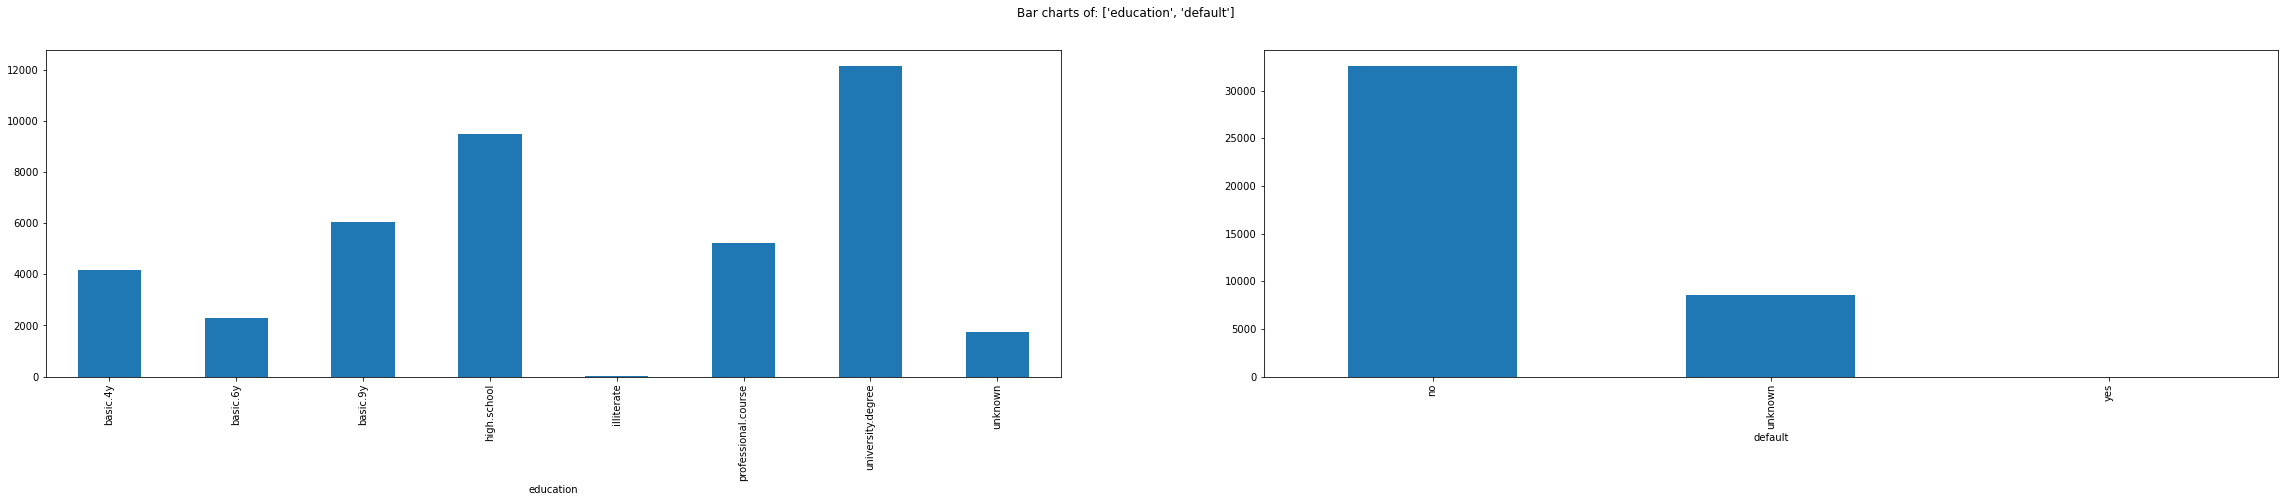

In [317]:
PlotBarCharts(inpData=dataset, colsToPlot=['education','default'])

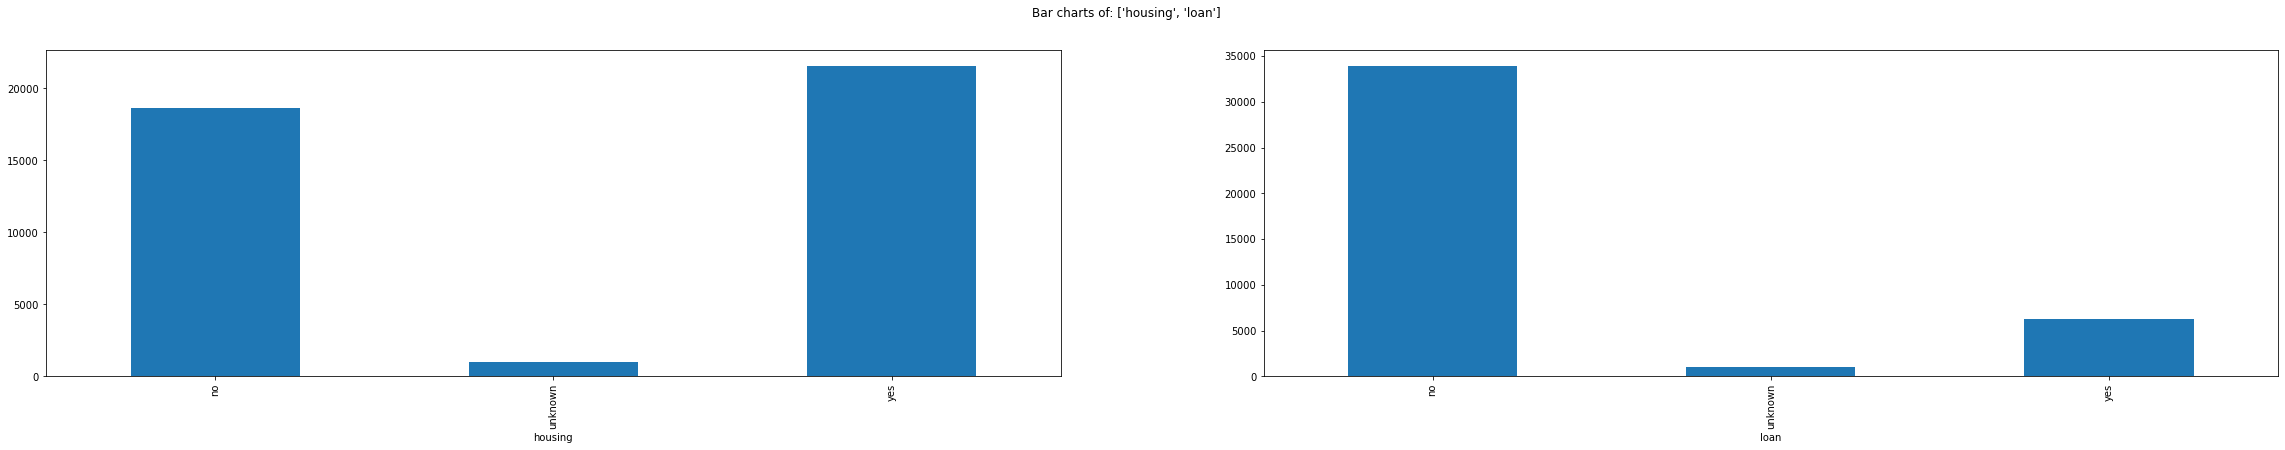

In [318]:
PlotBarCharts(inpData=dataset, colsToPlot=['housing','loan'])

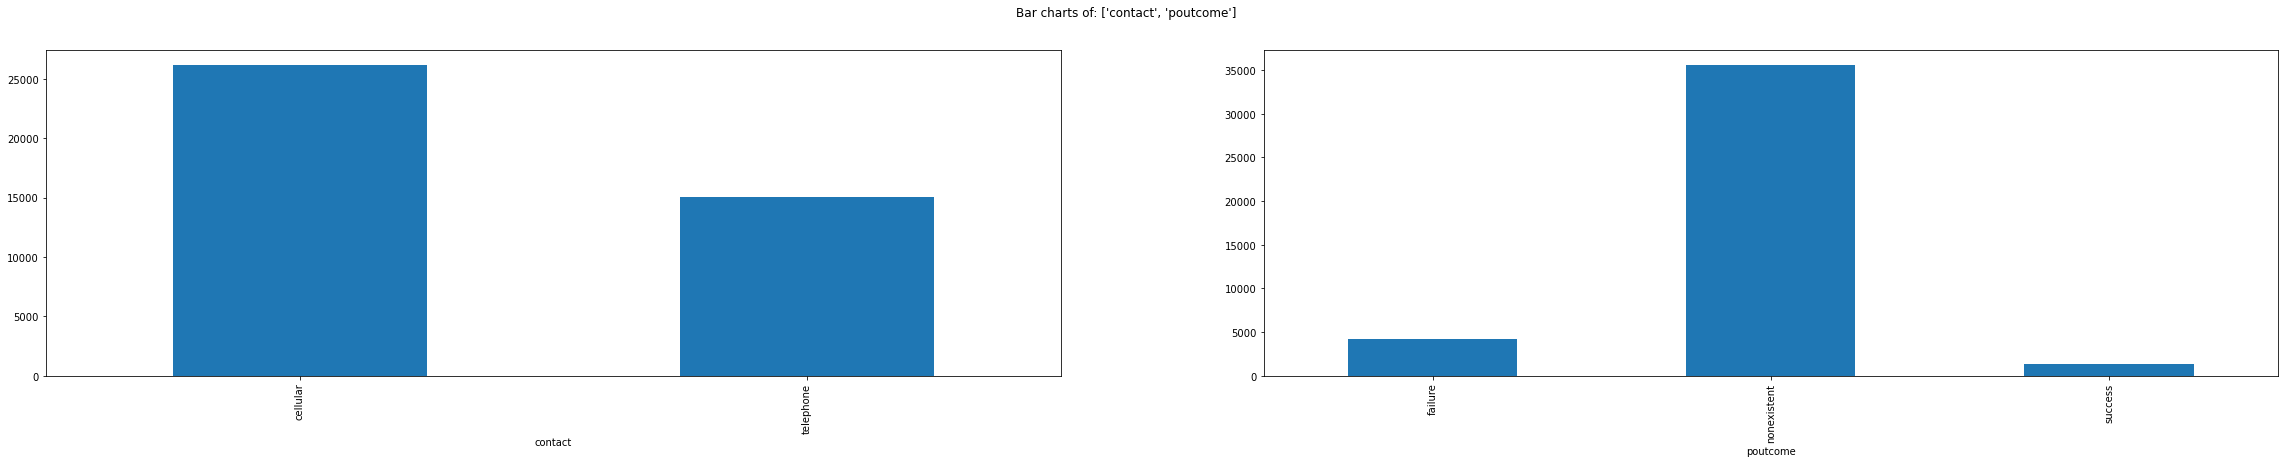

In [319]:
PlotBarCharts(inpData=dataset, colsToPlot=[ 'contact','poutcome'])

In [320]:
dataset.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

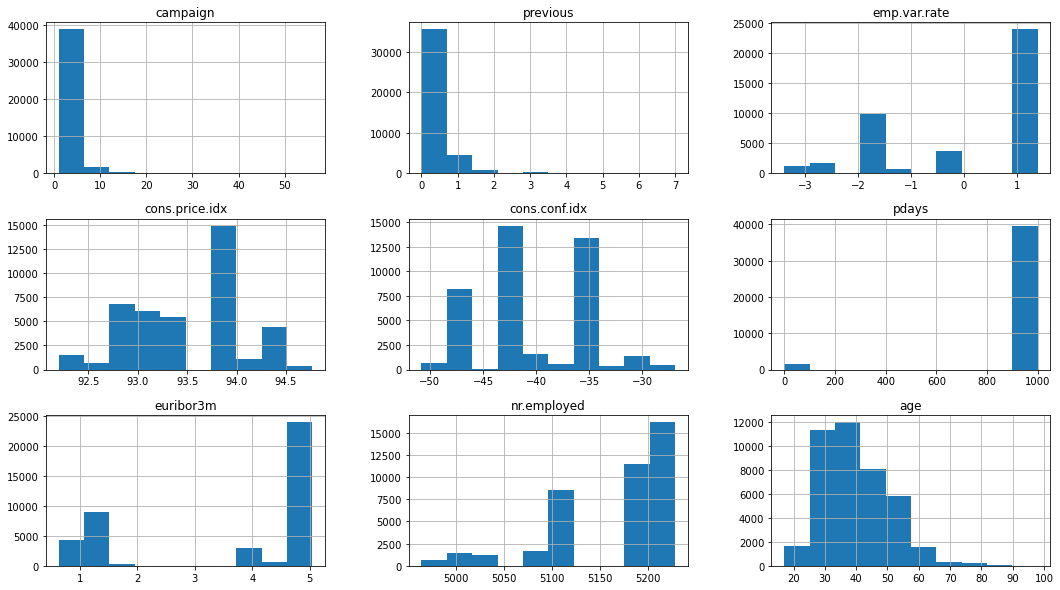

In [321]:
# Plotting the histogram  to see the distribution of our dataset.
SalaryData.hist(['campaign','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','pdays',
                 'euribor3m', 'nr.employed','age'],
                figsize=(18,10));


# Feature engineering

In [322]:
# We try to convert the binary variable to numeric
dataset['y']= dataset['y'].replace(['yes','no'],[1,0])

In [323]:
dataset['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

## Correlation

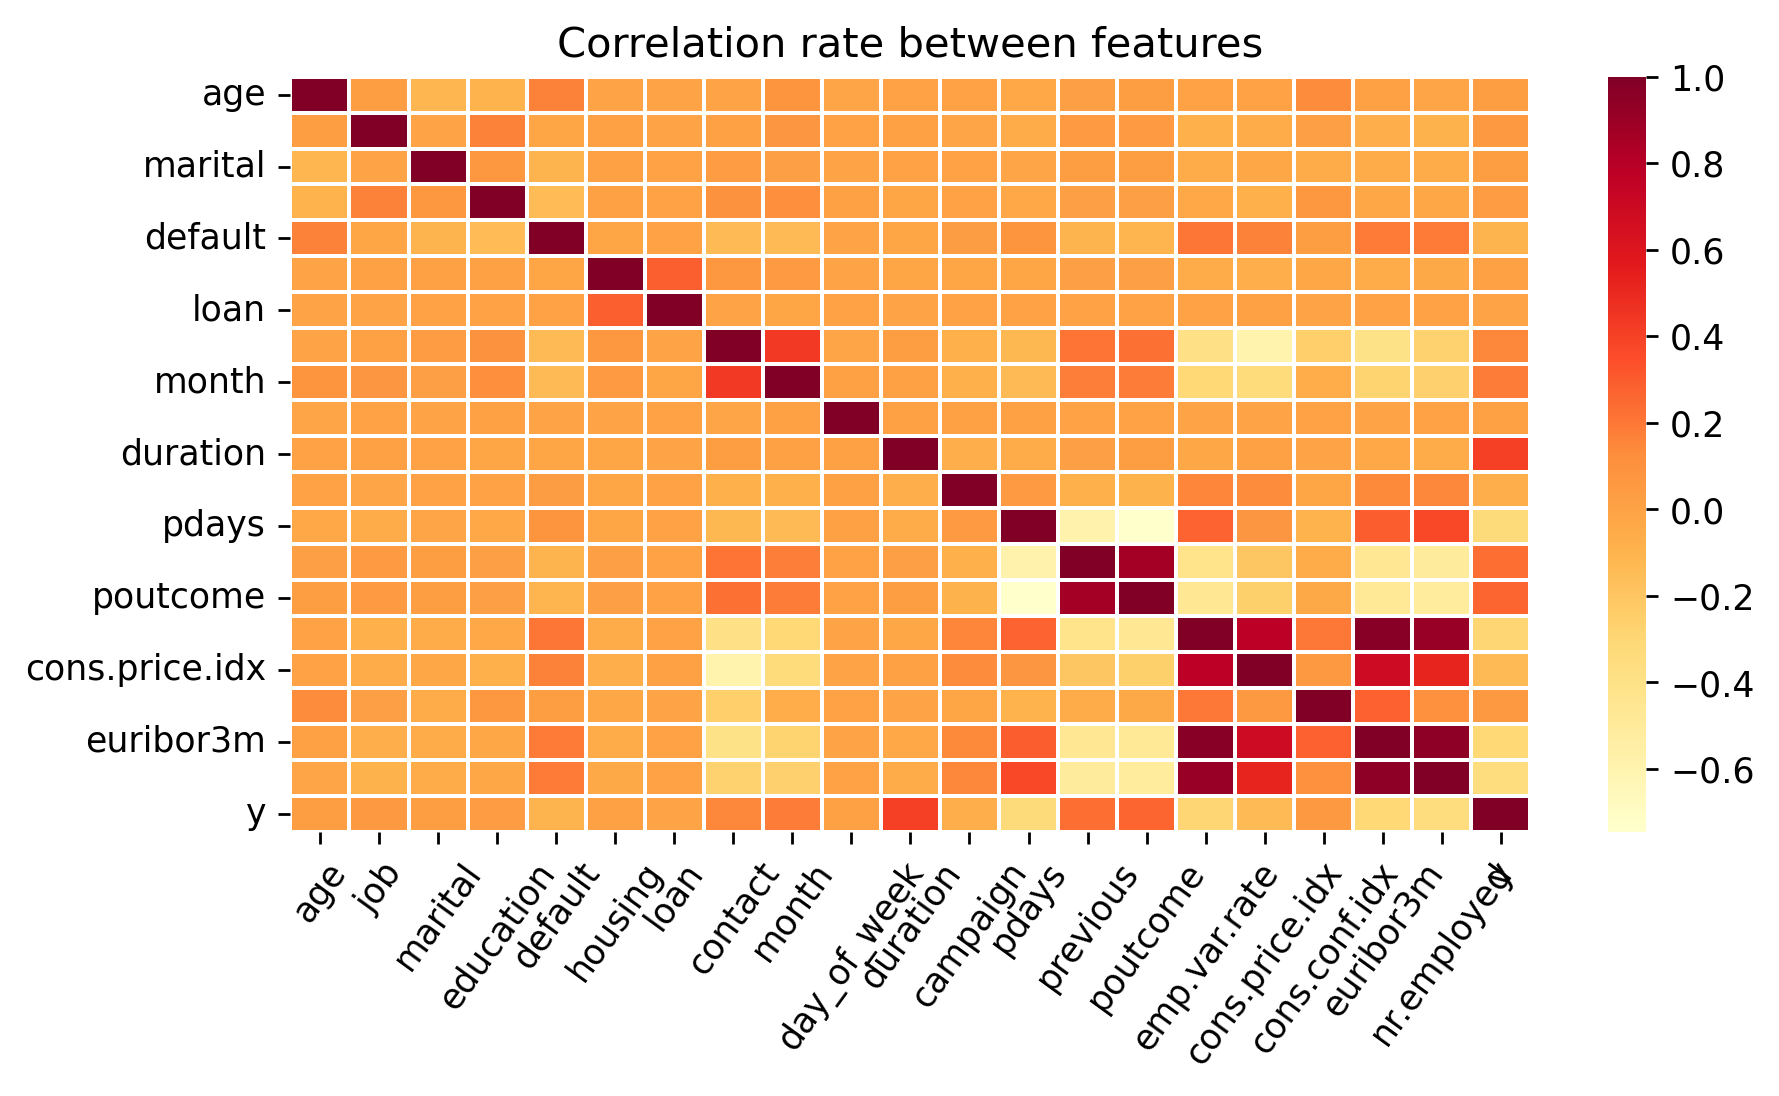

In [324]:
dataset2=dataset.copy()
for i in list(dataset.columns):
    if dataset[i].dtype == 'object':
        dataset2[i]=pd.factorize(dataset[i])[0]

plt.figure(figsize=(8, 4),dpi=250)
plt.title('Correlation rate between features')
sns.heatmap(dataset2.corr(),lw=1.1,linecolor='white',cmap='YlOrRd')
plt.xticks(rotation = 54 )
plt.yticks( )
plt.show()
corr_matrix = dataset.corr()

## Feature selection

In [325]:
# The function to determine the relationship of our numerical variables with the target variable 
def Anova(features, TargetVar, varList):
    from scipy.stats import f_oneway

    # The list of features that have a stong correlation
    SelectedPredictors=[]
    
    print('ANOVA Correlation :\n')
    for predictor in varList:
        CategoryGroupLists=features.groupby(TargetVar)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If our P value is les than 0.05, then we reject our null hypothesis
        if (AnovaResults[1] < 0.05):
            print(predictor, ' is NOT correlated with our target variable the P-value:', AnovaResults[1],'\n')
            SelectedPredictors.append(predictor)
        else:
            print(predictor, ' is NOT correlated with our target variable the P-value:',
                  AnovaResults[1])
    
    return(SelectedPredictors)

In [326]:
# List of our continuous variables
ContinuousVariables=['age','campaign','pdays','previous','emp.var.rate','cons.price.idx',
                   'cons.conf.idx','euribor3m','nr.employed']

Anova(features=SalaryData, TargetVar='y',
              varList=ContinuousVariables)

ANOVA Correlation :

age  is NOT correlated with our target variable the P-value: 7.003243845684908e-10 

campaign  is NOT correlated with our target variable the P-value: 2.0434309097339834e-41 

pdays  is NOT correlated with our target variable the P-value: 0.0 

previous  is NOT correlated with our target variable the P-value: 0.0 

emp.var.rate  is NOT correlated with our target variable the P-value: 0.0 

cons.price.idx  is NOT correlated with our target variable the P-value: 1.6222328681832695e-169 

cons.conf.idx  is NOT correlated with our target variable the P-value: 9.132175774550133e-29 

euribor3m  is NOT correlated with our target variable the P-value: 0.0 

nr.employed  is NOT correlated with our target variable the P-value: 0.0 



['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [327]:
# Defining a function to find the statistical relationship with all the categorical variables 

def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # The list of features that have a stong correlation
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the P-Value of chi-squared is less than 0.05, then we reject our null hypothesis
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [328]:
# Our categorical variables
CategoricalVariables=['job', 'marital', 'default','poutcome','loan','education'
                      ,'housing', 'contact','day_of_week','month']

# Calling the function to display the categorical variable
FunctionChisq(inpData=SalaryData, 
              TargetVariable='y',
              CategoricalVariablesList= CategoricalVariables)


job is correlated with y | P-Value: 3.2684116066165443e-199
marital is correlated with y | P-Value: 1.778422500461116e-26
default is correlated with y | P-Value: 5.2175408937279634e-89
poutcome is correlated with y | P-Value: 0.0
loan is NOT correlated with y | P-Value: 0.5771532081176227
education is correlated with y | P-Value: 3.746768377534744e-38
housing is NOT correlated with y | P-Value: 0.05663792749452545
contact is correlated with y | P-Value: 1.7187406241263769e-189
day_of_week is correlated with y | P-Value: 3.085754965631736e-05
month is correlated with y | P-Value: 0.0


['job',
 'marital',
 'default',
 'poutcome',
 'education',
 'contact',
 'day_of_week',
 'month']

In [329]:
import warnings
warnings.filterwarnings('ignore')
dataset=dataset.drop(["day_of_week","month","contact"],axis=1)
dataset["education"]=dataset["education"].replace(['basic.4y',
                'basic.6y','basic.9y','high.school','professional.course',
            'university.degree','illiterate',"unknown"],[4,6,9,12,14,17,0,np.nan])

dataset['education'] = dataset['education'].fillna(dataset['education'].mode()[0])

In [330]:
# Prediction Model by ANN¶

## 6. Outliers handeling

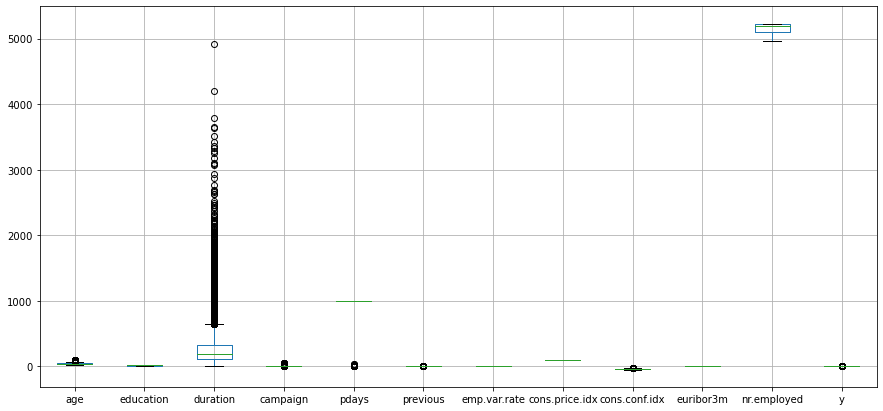

In [331]:
plt.figure(figsize=(15,7))
dataset.boxplot()
print()

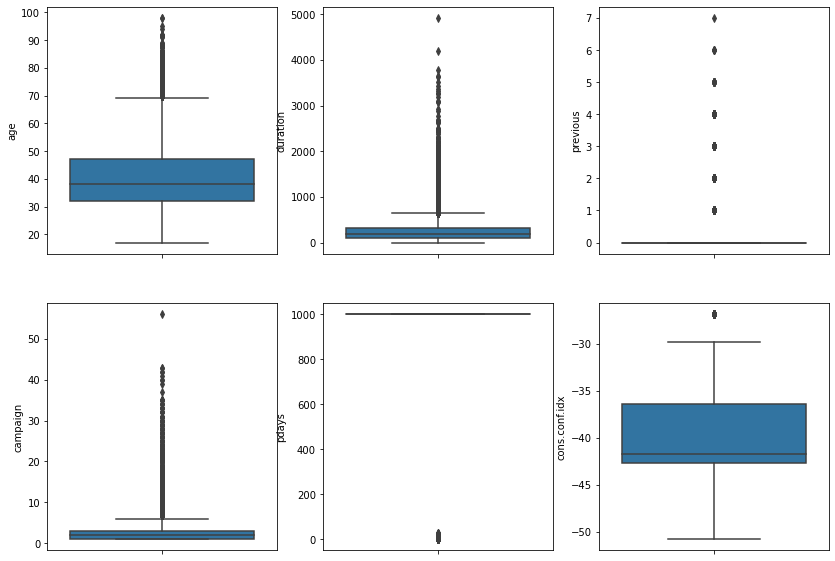

In [332]:

fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(14,10));
sns.boxplot(y=dataset["age"],ax=ax[0][0]);
sns.boxplot(y=dataset["duration"],ax=ax[0][1]);
sns.boxplot(y=dataset["previous"],ax=ax[0][2]);
sns.boxplot(y=dataset["campaign"],ax=ax[1][0]);
sns.boxplot(y=dataset["pdays"],ax=ax[1][1]);
sns.boxplot(y=dataset["cons.conf.idx"],ax=ax[1][2]);

In [333]:
# The variable duration has lot of outlier values Therefore we need to remove them
Q_1 = dataset['duration'].quantile(.25)
Q_3 = dataset['duration'].quantile(.75)
IQ_R = Q_3 - Q_1
low = Q_1 - 1.5 * IQ_R
up = Q_3 + 1.5 * IQ_R
dataset = dataset[dataset['duration'] >= low] 
dataset = dataset[dataset['duration'] <=up] 

## 7.Dataset balancing

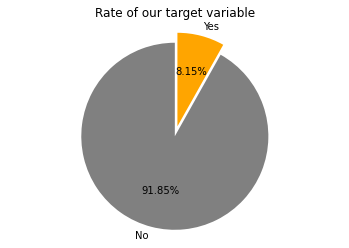

In [334]:
nbr_val=dataset["y"].value_counts().tolist()
nbr_val=[i * 100/sum(nbr_val) for i in nbr_val]
labels=["No","Yes"]
scale=nbr_val[0]/nbr_val[1]
explode = (0.01, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(nbr_val, explode=explode, labels=labels, autopct='%1.2f%%',shadow=False,
        colors=['grey','orange'],
        startangle=90)
ax1.axis('equal')
plt.title('Rate of our target variable')
plt.show()

# Resampling the dataset

In [335]:
# We drop the uncorrelated variables
X=dataset.drop(['y','loan','housing'],axis=1)
X.shape
y=dataset[['y']] 

In [336]:
#Covert categorical variables
categoricals=['job','marital','default','poutcome','campaign']
labelencoder = LabelEncoder()
for cat in categoricals:
    X[cat]      = labelencoder.fit_transform(X[cat]) 

print("The shape of our dataset is {}".format(X.shape))

The shape of our dataset is (38225, 15)


In [337]:
# We use resampling to increase the F1 score of the minority class 

#SMOTE for resampling

sm=SMOTE()
X_train_res, y_train_res= sm.fit_resample(X,y)

#creating the final train 
final_train=pd.concat([X_train_res, y_train_res],axis=1)
final_train['education'].value_counts() 




17.000000    21365
12.000000    10598
9.000000      5934
14.000000     5582
4.000000      4890
             ...  
13.120027        1
11.326067        1
6.325537         1
14.038103        1
12.309889        1
Name: education, Length: 19665, dtype: int64

# Data balanced

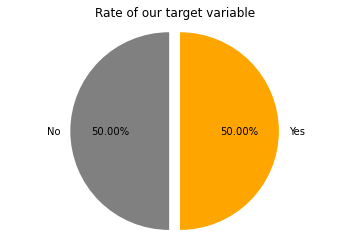

In [338]:
nbr_val=final_train["y"].value_counts().tolist()
nbr_val=[i * 100/sum(nbr_val) for i in nbr_val]
labels=["No","Yes"]
scale=nbr_val[0]/nbr_val[1]
explode = (0.01, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(nbr_val, explode=explode, labels=labels, autopct='%1.2f%%',
        colors=['grey','orange'],
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Rate of our target variable')
plt.show()

In [339]:
X=final_train.drop('y',axis=1)
y=final_train['y']


In [340]:
y

0        0
1        0
2        0
3        0
4        0
        ..
70217    1
70218    1
70219    1
70220    1
70221    1
Name: y, Length: 70222, dtype: int64

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [295]:
y_train=y_train.values


In [296]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, PowerTransformer
sc_y = StandardScaler()
sc_X = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [297]:

X_train.shape

(49155, 15)

# Compile

# Achitecture of our model

In [298]:


model = Sequential()
# First layer
model.add(Dense(32, activation='relu', input_shape=(15,)))
# Second layer
model.add(Dense(10, activation='softmax'))
# Third layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 853
Trainable params: 853
Non-trainable params: 0
_________________________________________________________________


In [299]:
# Deciding which loss function, metrics and optimizer to use.
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [300]:
# Now we are going to fit our model with the train data
model.fit(    
    X_train, 
    y_train, 
    batch_size=32, 
    epochs=8, verbose=1)

Epoch 1/8
1537/1537 [==============================] - 1s 582us/step - loss: -0.3713 - accuracy: 0.0000e+00
Epoch 2/8
1537/1537 [==============================] - 1s 570us/step - loss: -1.5876 - accuracy: 0.0000e+00
Epoch 3/8
1537/1537 [==============================] - 1s 565us/step - loss: -2.7129 - accuracy: 0.0000e+00
Epoch 4/8
1537/1537 [==============================] - 1s 566us/step - loss: -3.8311 - accuracy: 0.0000e+00
Epoch 5/8
1537/1537 [==============================] - 1s 564us/step - loss: -4.9693 - accuracy: 0.0000e+00
Epoch 6/8
1537/1537 [==============================] - 1s 563us/step - loss: -6.1042 - accuracy: 0.0000e+00
Epoch 7/8
1537/1537 [==============================] - 1s 557us/step - loss: -7.2536 - accuracy: 0.0000e+00
Epoch 8/8
1537/1537 [==============================] - 1s 557us/step - loss: -8.4029 - accuracy: 0.0000e+00


In [301]:
model.evaluate(X_train, y_train)

1537/1537 [==============================] - 1s 421us/step - loss: -8.9944 - accuracy: 0.0000e+00


[-8.99444580078125, 0.0]

In [302]:
model.evaluate(X_test, y_test)

659/659 [==============================] - 0s 694us/step - loss: 1.2937 - accuracy: 0.8592


[1.2937262058258057, 0.8592110872268677]

In [303]:
# The prediction of our test data
pred=model.predict(X_test)
print('The shape of our output :')    
print(pred.shape) # prints (n,1) but  need (n,)
pred=np.transpose(pred)[0]  # transformation to get (n,)
print(pred.shape)  # now the shape is (n,)
# Applying transformation to get binary values predictions with 0.5 as thresold
pred = list(map(lambda x: 0 if x<0.5 else 1, pred))

The shape of our output :
(21067, 1)
(21067,)


In [304]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Displaying our confusion matrix ( TP-TN-FP-FN )
cm = confusion_matrix(y_test, seq_predictions)
print(cm)

from sklearn.metrics import classification_report
# The statistical table that show the precision, recall and the F1 score of our target variable
matrix = classification_report(y_test,seq_predictions,labels=[1,0])
print('Classification report : \n',matrix)

# The ROC score of our model that determine the performance of our model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,seq_predictions)


[[9947  569]
 [2460 8091]]
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.77      0.84     10551
           0       0.80      0.95      0.87     10516

    accuracy                           0.86     21067
   macro avg       0.87      0.86      0.86     21067
weighted avg       0.87      0.86      0.86     21067



0.8563693592595354

Text(0.5, 15.0, 'Predicted label')

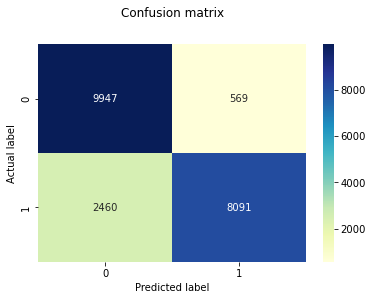

In [305]:
import seaborn as sns
# Plotting our confusion matrix score
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt="g")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# ROC Curve

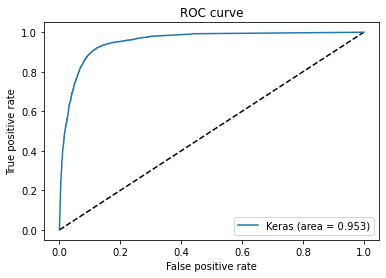

In [306]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

import matplotlib.pyplot as plt

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()